# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API Key
from config import weather_api

# # Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# # # Output File (CSV)
output_data_file = "output_data/cities.csv"

# # # Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
response_json = []

url = "http://api.openweathermap.org/data/2.5/weather?"

for x in range(len(cities)):
    print(f"Processing Record {x} for City: {cities[x]}")                                             
    weather_response = requests.get(url + "appid=" + weather_api + "&q=" + str(cities[x]))                          
    response_json.append(weather_response.json())

    
    

Processing Record 0 for City: yumen
Processing Record 1 for City: jamestown
Processing Record 2 for City: nantucket
Processing Record 3 for City: saskylakh
Processing Record 4 for City: castro
Processing Record 5 for City: zavodouspenskoye
Processing Record 6 for City: hilo
Processing Record 7 for City: cape town
Processing Record 8 for City: kapaa
Processing Record 9 for City: verkhnyaya inta
Processing Record 10 for City: gornoye loo
Processing Record 11 for City: faanui
Processing Record 12 for City: saint-philippe
Processing Record 13 for City: pangnirtung
Processing Record 14 for City: butaritari
Processing Record 15 for City: victoria
Processing Record 16 for City: hermanus
Processing Record 17 for City: georgetown
Processing Record 18 for City: mys shmidta
Processing Record 19 for City: lompoc
Processing Record 20 for City: kaitangata
Processing Record 21 for City: leningradskiy
Processing Record 22 for City: barranca
Processing Record 23 for City: beringovskiy
Processing Record

Processing Record 201 for City: avarua
Processing Record 202 for City: cherskiy
Processing Record 203 for City: ilulissat
Processing Record 204 for City: talcahuano
Processing Record 205 for City: zhigansk
Processing Record 206 for City: namsos
Processing Record 207 for City: salalah
Processing Record 208 for City: korla
Processing Record 209 for City: skibotn
Processing Record 210 for City: iracoubo
Processing Record 211 for City: tumannyy
Processing Record 212 for City: chegdomyn
Processing Record 213 for City: gat
Processing Record 214 for City: thompson
Processing Record 215 for City: naifaru
Processing Record 216 for City: srednekolymsk
Processing Record 217 for City: marystown
Processing Record 218 for City: puerto madryn
Processing Record 219 for City: guangyuan
Processing Record 220 for City: malumfashi
Processing Record 221 for City: east london
Processing Record 222 for City: scottsbluff
Processing Record 223 for City: mayor pablo lagerenza
Processing Record 224 for City: gop

Processing Record 399 for City: mandera
Processing Record 400 for City: ancud
Processing Record 401 for City: palmer
Processing Record 402 for City: yar-sale
Processing Record 403 for City: villa del rosario
Processing Record 404 for City: umm lajj
Processing Record 405 for City: pihuamo
Processing Record 406 for City: zonalnoye
Processing Record 407 for City: maryville
Processing Record 408 for City: axixa do tocantins
Processing Record 409 for City: adre
Processing Record 410 for City: artyshta
Processing Record 411 for City: acapulco
Processing Record 412 for City: noumea
Processing Record 413 for City: chernoistochinsk
Processing Record 414 for City: cockburn town
Processing Record 415 for City: lida
Processing Record 416 for City: dubbo
Processing Record 417 for City: nador
Processing Record 418 for City: nalut
Processing Record 419 for City: santiago
Processing Record 420 for City: valparaiso
Processing Record 421 for City: nikita
Processing Record 422 for City: namibe
Processing

Processing Record 598 for City: inuvik
Processing Record 599 for City: tabulbah
Processing Record 600 for City: buchanan
Processing Record 601 for City: waipawa
Processing Record 602 for City: hadgaon
Processing Record 603 for City: villazon
Processing Record 604 for City: barra
Processing Record 605 for City: mersing
Processing Record 606 for City: kaiu
Processing Record 607 for City: ormara
Processing Record 608 for City: manzhouli
Processing Record 609 for City: durusu
Processing Record 610 for City: san carlos del zulia


In [7]:
# response_json

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
from pprint import pprint

city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = [] 
max_temp = []
wind_speed = []

for city_weather in response_json: 
    try:
        city.append(city_weather['name'])                      
        cloudiness.append(city_weather['clouds']['all'])
        country.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])
        humidity.append(city_weather['main']['humidity'])
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        wind_speed.append(city_weather['wind']['speed'])    
    except:
#         print(city_weather)
        pass
    
# print(len(city))

In [9]:
# Conversions

# Convert Max Temp from K to F
max_temp_f = []

for i in max_temp: 
    max_temp_conversion = (i*(1.8)-459.67)
    max_temp_f.append(max_temp_conversion)

#Convert wind_speed to mph
wind_mph = []

for i in wind_speed: 
    wind_conversion = (i*1.621371)
    wind_mph.append(wind_conversion)

    

In [10]:
weather_dict = {"City": city, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, 
                 "Lat": lat, "Lng": lng, "Max Temp": max_temp_f, "Wind Speed": wind_mph}

weather_data = pd.DataFrame(weather_dict)
weather_data.sort_values(by=["Humidity"], ascending=False, inplace=True)
# weather_data["Humidity"].clip(lower=0, upper=100, inplace=True)
weather_data.head(10)
                 
          

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
425,Ryotsu,92,JP,1538246682,100,38.08,138.43,65.984,11.868436
377,Nikita,24,UA,1538246667,100,44.52,34.24,59.504,3.194101
184,Zhigansk,44,RU,1538246608,100,66.77,123.37,33.674,2.059141
396,Dakar,44,SN,1538246555,100,14.69,-17.45,80.474,6.680049
92,Sorland,92,NO,1538246579,100,67.67,12.69,48.884,15.111178
93,Buala,44,SB,1538246579,100,-8.15,159.59,78.314,2.626621
534,Buchanan,92,LR,1538246718,100,5.88,-10.05,77.414,5.301883
471,Namatanai,0,PG,1538246697,100,-3.66,152.44,81.734,11.219887
96,Clyde River,56,CA,1538246580,100,70.47,-68.59,24.584,3.761581
412,Ahipara,0,NZ,1538246678,100,-35.17,173.16,40.874,2.707690


In [22]:
#Export Dataframe to CSV

weather_data.to_csv("weather_data.csv")

In [13]:
# Clip humidity > 100 (I did this because when I ran previously some humidities were over 100%)

weather_data["Humidity"].clip(lower=0, upper=100, inplace=True)
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
425,Ryotsu,92,JP,1538246682,100,38.08,138.43,65.984,11.868436
377,Nikita,24,UA,1538246667,100,44.52,34.24,59.504,3.194101
184,Zhigansk,44,RU,1538246608,100,66.77,123.37,33.674,2.059141
396,Dakar,44,SN,1538246555,100,14.69,-17.45,80.474,6.680049
92,Sorland,92,NO,1538246579,100,67.67,12.69,48.884,15.111178
93,Buala,44,SB,1538246579,100,-8.15,159.59,78.314,2.626621
534,Buchanan,92,LR,1538246718,100,5.88,-10.05,77.414,5.301883
471,Namatanai,0,PG,1538246697,100,-3.66,152.44,81.734,11.219887
96,Clyde River,56,CA,1538246580,100,70.47,-68.59,24.584,3.761581
412,Ahipara,0,NZ,1538246678,100,-35.17,173.16,40.874,2.707690


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

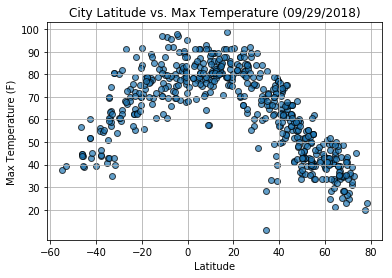

In [18]:
date = time.strftime("%m/%d/%Y")

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], alpha=.7, edgecolors='black')

plt.title("City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.yticks(np.arange(20, 110, 10))
plt.grid(True)

plt.savefig("Lat_vs_Temp.png")

#### Latitude vs. Humidity Plot

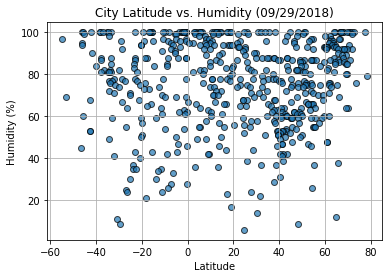

In [19]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], alpha=.7, edgecolors='black')

plt.title("City Latitude vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Lat_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

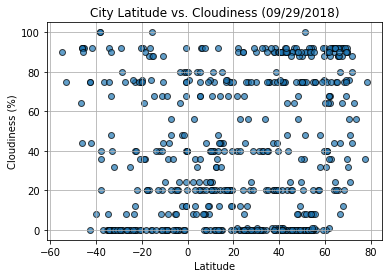

In [20]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], alpha=.7, edgecolors='black')

plt.title("City Latitude vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Lat_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

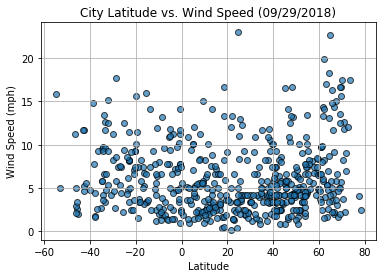

In [21]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], alpha=.7, edgecolors='black')

plt.title("City Latitude vs. Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Lat_vs_Wind_Speed.png")